In [1]:
!pip install xmltodict


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: c:\Users\jermy\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


Jeremy Esperanza
-
#1 - Retrieve historical exchange data from floatrates.com for one of the 52 available currencies
- Store code in XML or JSON
- Organize each currency into its own directory (?)
- Ensure code is modular, maintainable, robust against timeouts or malformed entries

Provided code obtains a random exchange rate for a single currency against all other currencies.
Example code was run first, taken apart and placed into multiple functions with some modification.
The code is able to generate a JSON file when run in Jupyter Notebook, but fails to do so in the Python file 
despite running normally.



In [12]:
#initial variables and imports from example
rates = ["EUR", "GBP", "USD", "DZD", "AUD", "BWP", "BND", "CAD", "CLP", "CNY", "COP", "CZK", "DKK", "HUF", "ISK", "INR", "IDR", "ILS", "KZT", "KRW", "KWD", "LYD", "MYR", "MUR", "NPR", "NZD", "NOK", "OMR", "PKR", "PLN", "QAR", "RUB", "SAR", "SGD", "ZAR", "LKR", "SEK", "CHF", "THB", "TTD"]
ratesForBase = [r for r in rates if r != "USD" and r != "EUR" and r != "GBP"]
import requests
import xmltodict
import json
import random
import threading
import time
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#create list using randomly selected currencies - unused
def create_currencylist():
    crlist = []
    for i in range(5):
        temp = random.choice(ratesForBase)
        crlist.append(temp)
    print(crlist)
    return crlist

#obtain json of a currency
def obtainCurrencyRates(currency):
    if currency not in ratesForBase:
        return "invalid currency input"
    else:
        #code below is taken from example
        date = "2011-05-04"
        base = currency
        url = f"https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date={date}&base_currency_code={base}&format_type=xml"
        print(url)
        # Fetch the XML data
        response = requests.get(url)
        response.raise_for_status()  # Ensure we notice bad responses
        
        # Parse the XML data to a Python dictionary
        data_dict = xmltodict.parse(response.text)
        
        # Convert the dictionary to a JSON string
        json_data = json.dumps(data_dict, indent=4)
        
        # Print the JSON data
        print(json_data)
        
        # Optionally, write the JSON data to a file
        with open(f"{date}_exchange_rates_{base}.json", "w") as json_file:
            json_file.write(json_data)


        
    
#implement threads
def currency_threads(inputlist):
    threads = []
    for i in inputlist:
        thread = threading.Thread(target = obtainCurrencyRates, args = (i,))
        threads.append(thread)
    print (threads)
    for i in threads:
        i.start()
    
currency_threads(create_currencylist())
    

In [8]:
#obtain file of selected currency
def obtainCurrencyRates(currency):
    if currency not in ratesForBase:
        return "invalid currency input"
    else:
        #code below is taken from example
        date = "2011-05-04"
        base = currency
        url = f"https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date={date}&base_currency_code={base}&format_type=xml"
        print(url)
        # Fetch the XML data
        response = requests.get(url)
        response.raise_for_status()  # Ensure we notice bad responses
        
        # Parse the XML data to a Python dictionary
        data_dict = xmltodict.parse(response.text)
        
        # Convert the dictionary to a JSON string
        json_data = json.dumps(data_dict, indent=4)
        
        # Print the JSON data
        print(json_data)
        
        # Optionally, write the JSON data to a file
        with open(f"{date}_exchange_rates_{base}.json", "w") as json_file:
            json_file.write(json_data)



'invalid currency input'

In [11]:
#unused
global currencyselect
print(currencyselect)
#currencyselect needs to be a global to be obtained from the selectCurrency function

AUD


In [ ]:
#unused
global currencyselect
obtainCurrencyRates(currencyselect)

In [ ]:
#code block provided from the example
rates = ["EUR", "GBP", "USD", "DZD", "AUD", "BWP", "BND", "CAD", "CLP", "CNY", "COP", "CZK", "DKK", "HUF", "ISK", "INR", "IDR", "ILS", "KZT", "KRW", "KWD", "LYD", "MYR", "MUR", "NPR", "NZD", "NOK", "OMR", "PKR", "PLN", "QAR", "RUB", "SAR", "SGD", "ZAR", "LKR", "SEK", "CHF", "THB", "TTD"]
ratesForBase = [r for r in rates if r != "USD" and r != "EUR" and r != "GBP"]
import requests
import xmltodict
import json
import random

# URL of the XML data
date = "2011-05-04"
base = random.choice(ratesForBase)
url = f"https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date={date}&base_currency_code={base}&format_type=xml"
print(url)
# Fetch the XML data
response = requests.get(url)
response.raise_for_status()  # Ensure we notice bad responses

# Parse the XML data to a Python dictionary
data_dict = xmltodict.parse(response.text)

# Convert the dictionary to a JSON string
json_data = json.dumps(data_dict, indent=4)

# Print the JSON data
print(json_data)

# Optionally, write the JSON data to a file
with open(f"{date}_exchange_rates_{base}.json", "w") as json_file:
    json_file.write(json_data)

#2 - Perform Exploratory Data Analysis on the dataset from #1
- Aggregate and visualize trends in exchange over time for at least 5 major currencies
- Identify periods of volatility - perhaps during economic upheaval
- Generate at least multiple visualizations using seaborn




In [137]:
def create_currencylist2():
    global targetlist
    targetlist = []
    for i in range(5):
        temp = random.choice(ratesForBase)
        targetlist.append(temp)
    print(targetlist)
#obtain file of selected currency
def obtainCurrencyRates2(currency):
    global currencylist
    if currency not in ratesForBase:
        return "invalid currency input"
    else:
        #code below is taken from example
        for i in range(5):
            date = f"2011-0{i + 5}-04"
            base = currency
            url = f"https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date={date}&base_currency_code={base}&format_type=xml"
            print(url)
            # Fetch the XML data
            response = requests.get(url)
            response.raise_for_status()  # Ensure we notice bad responses
            
            # Parse the XML data to a Python dictionary
            data_dict = xmltodict.parse(response.text)
            currencylist.append(data_dict)
global currencylist
currencylist = []
create_currencylist2()
for i in targetlist:
    obtainCurrencyRates2(i)

['MUR', 'KZT', 'OMR', 'MYR', 'HUF']
https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date=2011-05-04&base_currency_code=MUR&format_type=xml
https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date=2011-06-04&base_currency_code=MUR&format_type=xml
https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date=2011-07-04&base_currency_code=MUR&format_type=xml
https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date=2011-08-04&base_currency_code=MUR&format_type=xml
https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date=2011-09-04&base_currency_code=MUR&format_type=xml
https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date=2011-05-04&base_currency

In [26]:
for i in range(5):
    temp = f"2011-0{i + 5}-04"
    print(temp)

2011-05-04
2011-06-04
2011-07-04
2011-08-04
2011-09-04


In [ ]:
global currencylist
print(currencylist)

In [3]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import random

In [34]:
obtainCurrencyRates2("AUD")

https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date=2011-05-04&base_currency_code=AUD&format_type=xml
https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date=2011-06-04&base_currency_code=AUD&format_type=xml
https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date=2011-07-04&base_currency_code=AUD&format_type=xml
https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date=2011-08-04&base_currency_code=AUD&format_type=xml
https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date=2011-09-04&base_currency_code=AUD&format_type=xml


In [136]:
global targetlist
print(targetlist)

['BWP', 'HUF', 'SEK', 'ILS', 'ILS']


In [152]:
global currencylist
index = 0
for i in currencylist:
    #print(currencylist[index]['channel']['title'])
    print(currencylist[index]['channel']['item'][1]['title'])
    index += 1

1 MUR = 0.022231 GBP
1 MUR = 0.232919 CNY
1 MUR = 0.228404 CNY
1 MUR = 0.229511 CNY
1 MUR = 2.755258 JPY
1 KZT = 0.004152 GBP
1 KZT = 0.044543 CNY
1 KZT = 0.044322 CNY
1 KZT = 0.044029 CNY
1 KZT = 0.524001 JPY
1 OMR = 1.574279 GBP
1 OMR = 16.855764 CNY
1 OMR = 16.809972 CNY
1 OMR = 16.746996 CNY
1 OMR = 199.842558 JPY
1 MYR = 0.203192 GBP
1 MYR = 2.150923 CNY
1 MYR = 2.152980 CNY
1 MYR = 2.160445 CNY
1 MYR = 25.891461 JPY
1 HUF = 0.003394 GBP
1 HUF = 0.035519 CNY
1 HUF = 0.035568 CNY
1 HUF = 0.033597 CNY
1 HUF = 0.397317 JPY


In [144]:
global currencylist
global targetlist

compdict = { }
index = 0
for k in targetlist:
    temp1 = {k : []}
    compdict.update(temp1)
for i in currencylist[index]['channel']['item']:
    #print(i['channel'])
    #print(i['targetName'])
    #print(i["exchangeRate"])
    for j in targetlist:
        #print(k)
        
        if i["targetName"] == "Euro":
            #print("true")
            #print(compdict[k])
            #print(j["exchangeRate"])
            compdict[j].append(i["exchangeRate"])
    index += 1
print(compdict)

{'MUR': ['0.024678'], 'KZT': ['0.024678'], 'OMR': ['0.024678'], 'MYR': ['0.024678'], 'HUF': ['0.024678']}


In [140]:
df = pd.DataFrame(compdict)
print(df)

         MUR       KZT       OMR       MYR       HUF
0   0.024678  0.024678  0.024678  0.024678  0.024678
1   0.024757  0.024757  0.024757  0.024757  0.024757
2   0.024340  0.024340  0.024340  0.024340  0.024340
3   0.025065  0.025065  0.025065  0.025065  0.025065
4   0.025184  0.025184  0.025184  0.025184  0.025184
5   0.004609  0.004609  0.004609  0.004609  0.004609
6   0.004734  0.004734  0.004734  0.004734  0.004734
7   0.004723  0.004723  0.004723  0.004723  0.004723
8   0.004808  0.004808  0.004808  0.004808  0.004808
9   0.004789  0.004789  0.004789  0.004789  0.004789
10  1.747601  1.747601  1.747601  1.747601  1.747601
11  1.791591  1.791591  1.791591  1.791591  1.791591
12  1.791337  1.791337  1.791337  1.791337  1.791337
13  1.828916  1.828916  1.828916  1.828916  1.828916
14  1.826611  1.826611  1.826611  1.826611  1.826611
15  0.225563  0.225563  0.225563  0.225563  0.225563
16  0.228621  0.228621  0.228621  0.228621  0.228621
17  0.229430  0.229430  0.229430  0.229430  0.

<Axes: xlabel='Month', ylabel='Euro'>

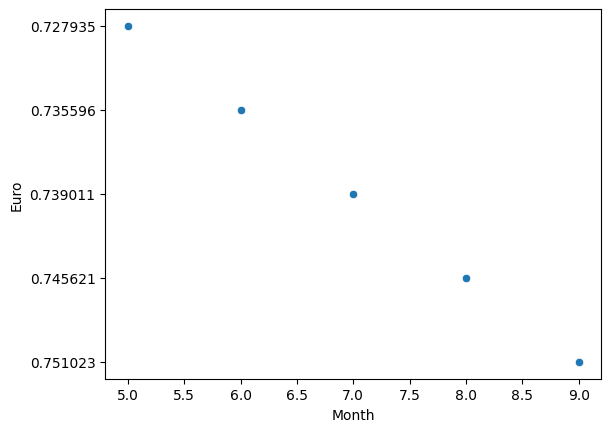

In [64]:

sns.scatterplot(x='Month',y = 'Euro', data=df)